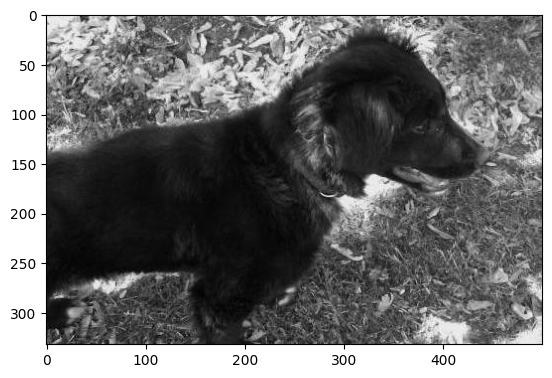

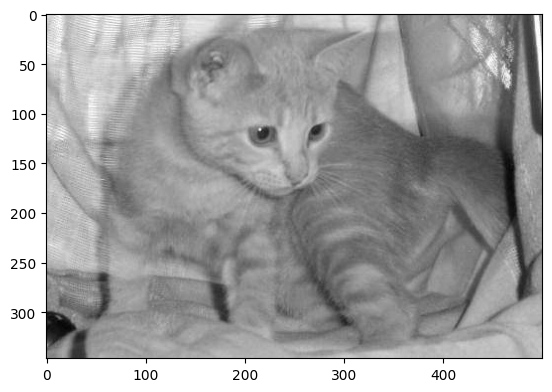

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Modul os agar bisa berinteraksi dengan sistem operasi
import os
# Modul opencv digunakan untuk membaca dan menampilkan gambar 
import cv2

DATADIR = "Hewan"
# Didalam direktori hewan terdapat subdir Kucing dan Anjing
CATEGORIES = ["Anjing", "Kucing"]

for kategori in CATEGORIES:
  #Masuk ke dalam direktori Hewan>Anjing dan Hewan>Kucing
  masukDirektori = os.path.join(DATADIR, kategori)

  """
  Tes apakah direktori dapat dibaca dengan baik.
  Tampilkan gambar dalam masing-masing direktori (Kucing+Anjing).
  Dan dengan warna grayscale.
  """
  for gambar in os.listdir(masukDirektori):
      gambarArray = cv2.imread(os.path.join(masukDirektori,gambar), cv2.IMREAD_GRAYSCALE)
      plt.imshow(gambarArray, cmap="gray")
      plt.show()
      # Gunakan break untuk loading hanya 1 gambar
      break

In [2]:
# Cek size gambar dengan shape (height, width)
print(gambarArray.shape)

(347, 500)


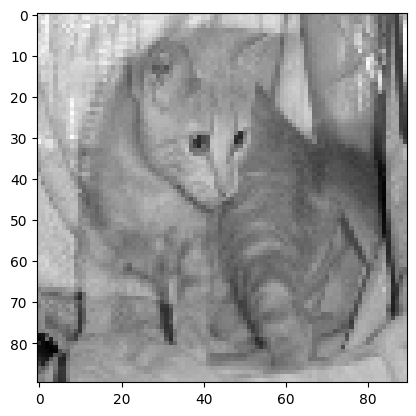

In [3]:
# Resize gambar ke ukuran 90x90 pixel
UKURAN_GAMBAR = 90

arrayBaru = cv2.resize(gambarArray, (UKURAN_GAMBAR, UKURAN_GAMBAR))
plt.imshow(arrayBaru, cmap="gray")
plt.show()

In [4]:
dataTraining = []

def buatDataTraining():
    for kategori in CATEGORIES:
        masukDirektori = os.path.join(DATADIR, kategori)
        # Ambil nomor klasifikasi (0 atau 1), 0 = Anjing 1 = Kucing
        nomorKlasifikasi = CATEGORIES.index(kategori)
        print(nomorKlasifikasi)
        for gambar in os.listdir(masukDirektori):
          try:
            gambarArray = cv2.imread(os.path.join(masukDirektori, gambar), cv2.IMREAD_GRAYSCALE)
            # Resize untuk normalisasi ukuran data
            arrayBaru = cv2.resize(gambarArray, (UKURAN_GAMBAR, UKURAN_GAMBAR))
            # Tambah isi list dataTraining
            dataTraining.append([arrayBaru, nomorKlasifikasi])
          except Exception as e:
           pass

buatDataTraining()


0
1


In [5]:
print(len(dataTraining))

200


In [6]:
"""
Selanjutnya mengacak data. 
Saat ini semua data hanyalah anjing, kemudian semua Kucing
Ini biasanya ajan menyebabkan masalah juga.
Karena pada awalnya, Classifier itu akan belajar hanya untuk memprediksi anjing
 setelah itu memprediksi semua kucing.
 """
import random

random.shuffle(dataTraining)


In [7]:
"""
Variable X dan variable Y D digunakan untuk menyimpan label dan Feature
Label yang berisi karakter A-Z dan 0-9 sedangkan Feature berisi data image array masing-masing
label tersebut.
"""
X = []
Y = []

for features, label in dataTraining:
    X.append(features)
    Y.append(label)
    """
    Fungsi reshape digunakan untuk memberikan bentuk baru ke array tanpa mengubah datanya.
    -1,1 bentuk 1 kolom dengan 1 baris.
    """
X = np.array(X).reshape(-1, UKURAN_GAMBAR, UKURAN_GAMBAR, 1)


In [8]:
# Modul Pickle adalah dependensi yang berfungsi untuk menyimpan file untuk model Data Training.
import pickle

"""
Tulis isi variable X dan variable Y kedalam sebuah file pickle
File picklr tersebut nanti akan di load ketika proses Training Data.
Pickling adalah cara mengubah objek Python (List, Dist dll) menjadi byte stream.

wb artinya writing atau overwrite apabila file sudah ada.
rb artinya Reading Mode.
konvert dan file yang objeknya harus disimpan
Kemudian close pickle-nya
"""
pickleOut = open("X.pickle", "wb")
pickle.dump(X, pickleOut)
pickleOut.close()

pickleOut = open("Y.pickle", "wb")
pickle.dump(Y, pickleOut)
pickleOut.close()


In [9]:
# Buka File Pickle
pickleIn = open("X.pickle", "rb")
X = pickle.load(pickleIn)


In [10]:
X[1]

array([[[122],
        [126],
        [124],
        ...,
        [102],
        [ 99],
        [100]],

       [[122],
        [128],
        [126],
        ...,
        [105],
        [ 96],
        [ 94]],

       [[124],
        [127],
        [130],
        ...,
        [117],
        [ 97],
        [ 92]],

       ...,

       [[ 69],
        [ 74],
        [ 80],
        ...,
        [ 33],
        [ 27],
        [ 20]],

       [[ 68],
        [ 66],
        [ 68],
        ...,
        [ 29],
        [ 22],
        [ 17]],

       [[ 49],
        [ 56],
        [ 58],
        ...,
        [ 29],
        [ 22],
        [ 17]]], dtype=uint8)

In [11]:
# CONVOLUTIONAL NEURAL NETWORK (CNN)
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import pickle

# Loading object dari file
X = pickle.load(open("X.pickle", "rb"))
Y = pickle.load(open("Y.pickle", "rb"))

# convert X dan Y ke numpy array 
X = np.array(X)
Y = np.array(Y)

# 255 Adalah value dari gambar Grayscale
X = X/255.0

# Untuk memulai network model dengan Keras digunakan fungsi Sequential()
model = Sequential()

"""
Conv2D adalah 2D convolution layer.
Layer ini membuat sebuah karnel agar dapat memperoduksi keluaran dari layer input
Anda perlu mensetting nilai tergantung pada 
(1) seberapa kompleks dataset dan (2) kedalaman neural network.
Tapi direkomendasikan memulai filter pada rentang [32,64,128] untuk tahap awal.
Bisa ditingkatkan ke [256, 512, 1024] untuk layer yang lebih dalam.

"""
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))

"""
ReLu singkatan dari Rectified Linear Unit, yaitu fungsi aktivasi paling umum digunakan
dalam Neural Networks, terutama di CNN
"""
model.add(Activation("relu"))
"""
Max Pooling adalah strategi downsampling dalam Convolutional Neural Networks.
digunakan filter 2x2.
Tahap downsampling merupakan proses untuk menurunkan jumlah pixel
dan menghilangkan sebagian informasi dari Citra.
Dengan resolusi citra yang tetap, downsampling menghasilkan citra yang lebih kecil
"""
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# Flatten akan meratakan semua nilai tensor menjadi 1-D
model.add(Flatten())
"""
Dense Layer adalah lapisan yang terhubung penuh.
Artinya semua neuron dalam lapisan terhubung dengan neuron dalam lapisan berikutnya
"""
model.add(Dense(64))

model.add(Dense(1))
"""
Fungsi sigmoid mengubah nilai input menjadi output antara 0,0 dan 1.0.
Setiap input yang lebih besar dari 1.0 akan di transformasikan menjadi 1.0.
dan setiap input yang lebih kecil dari 0.0 akan di transformasikan menjadi 0.0
"""
model.add(Activation("sigmoid"))
"""
Binary crossentropy adalah fungsi yang digunakan pada masalah yang melibatkan keputusan
ya/tidak (biner)
pilihan algoritma pengoptimalan untuk model deep learning dapat memberikan perbedaan hasil
dalam hitungan menit, jam dan hari.
Algoritma optimasi Adam adalah perpanjangan Stochastic Gradient Descent
yang baru-baru ini mengadopsi lebih luas untuk aplikasi deep learning dalam Computer Vision
dab Batural Language Processing..
"""
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model.fit(X, Y, batch_size=32, epochs=12, validation_split=0.2)

Epoch 1/12
5/5 [==============================] - 5s 737ms/step - loss: 1.0343 - accuracy: 0.4688 - val_loss: 0.6832 - val_accuracy: 0.5750
Epoch 2/12
5/5 [==============================] - 7s 2s/step - loss: 0.6893 - accuracy: 0.5312 - val_loss: 0.6984 - val_accuracy: 0.4750
Epoch 3/12
5/5 [==============================] - 6s 1s/step - loss: 0.6833 - accuracy: 0.5437 - val_loss: 0.6806 - val_accuracy: 0.6000
Epoch 4/12
5/5 [==============================] - 7s 1s/step - loss: 0.6593 - accuracy: 0.7000 - val_loss: 0.6633 - val_accuracy: 0.7500
Epoch 5/12
5/5 [==============================] - 6s 1s/step - loss: 0.6149 - accuracy: 0.7188 - val_loss: 0.6830 - val_accuracy: 0.5000
Epoch 6/12
5/5 [==============================] - 5s 934ms/step - loss: 0.5646 - accuracy: 0.7250 - val_loss: 0.6537 - val_accuracy: 0.6750
Epoch 7/12
5/5 [==============================] - 3s 635ms/step - loss: 0.4730 - accuracy: 0.8875 - val_loss: 0.6356 - val_accuracy: 0.7000
Epoch 8/12
5/5 [================

In [12]:
# Nonaktifkan XLA optimization
tf.config.optimizer.set_jit(False)
model.save("cnn7.model")

In [16]:
import cv2
import tensorflow as tf
import numpy as np

def prepare(filepath):
    IMG_SIZE = 90
    gambarArray = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    gambarArray = np.array(gambarArray).astype(np.float32)
    arrayBaru = cv2.resize(gambarArray, (IMG_SIZE, IMG_SIZE))
    return arrayBaru.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  

model = tf.keras.models.load_model("cnn7.model")

# prediksi dengan gambar kucing/anjing acak diambil dari internet
prediksi = model.predict([prepare('kucing_1.jpg')])
print(prediksi)
print(CATEGORIES[int(prediksi[0][0])])


1/1 [==============================] - 0s 133ms/step
[[1.]]
Kucing
